# Country Comparison Analysis
# This notebook compares solar metrics across Benin, Sierra Leone, and Togo
#using the cleaned datasets from the EDA process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

    # Set plotting style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
## 1. Load the cleaned datasets

In [6]:
# Benin
try:
    benin_df = pd.read_csv('../data/benin_clean.csv')
    print(f"Loaded Benin data: {benin_df.shape[0]} rows, {benin_df.shape[1]} columns")
    benin_df['Country'] = 'Benin'
except Exception as e:
    print(f"Error loading Benin data: {e}")
    benin_df = None
    # Sierra Leone
try:
    sierraleone_df = pd.read_csv('../data/sierraleone_clean.csv')
    print(f"Loaded Sierra Leone data: {sierraleone_df.shape[0]} rows, {sierraleone_df.shape[1]} columns")
    sierraleone_df['Country'] = 'Sierra Leone'
except Exception as e:
        print(f"Error loading Sierra Leone data: {e}")
        sierraleone_df = None
    # Togo
try:
    togo_df = pd.read_csv('../data/togo_clean.csv')
    print(f"Loaded Togo data: {togo_df.shape[0]} rows, {togo_df.shape[1]} columns")
    togo_df['Country'] = 'Togo'
except Exception as e:
      print(f"Error loading Togo data: {e}")
      togo_df = None

Loaded Benin data: 525042 rows, 30 columns
Loaded Sierra Leone data: 524977 rows, 30 columns
Loaded Togo data: 525141 rows, 30 columns


## 2. Combine the datasets

In [7]:
country_dfs = []
if benin_df is not None:
    country_dfs.append(benin_df) 
if sierraleone_df is not None:
    country_dfs.append(sierraleone_df)
if togo_df is not None:
    country_dfs.append(togo_df)
if not country_dfs:
        raise Exception("No data could be loaded. Please run the EDA scripts first to generate clean data files.")
# Focus on common columns  
metrics = ['GHI', 'DNI', 'DHI']
required_cols = metrics + ['Country']
for country_df in country_dfs:
    missing_cols = [col for col in required_cols if col not in country_df.columns]
    if missing_cols:
        print(f"Warning: {country_df['Country'].iloc[0]} data is missing columns: {missing_cols}")
# Create combined dataset with only the required columns
combined_data = []
for country_df in country_dfs:
    available_cols = [col for col in required_cols if col in country_df.columns]
    combined_data.append(country_df[available_cols])
    combined_df = pd.concat(combined_data, ignore_index=True)
    print(f"Combined dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")
   
    available_cols = [col for col in required_cols if col in country_df.columns]
    combined_data.append(country_df[available_cols])
    combined_df = pd.concat(combined_data, ignore_index=True)
    print(f"Combined dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")
    available_cols = [col for col in required_cols if col in country_df.columns]
    combined_data.append(country_df[available_cols])
    combined_df = pd.concat(combined_data, ignore_index=True)
    print(f"Combined dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")
    combined_df = pd.concat(combined_data, ignore_index=True)
    print(f"Combined dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")
    print(f"Combined dataset: {combined_df.shape[0]} rows, {combined_df.shape[1]} columns")

Combined dataset: 525042 rows, 4 columns
Combined dataset: 1050084 rows, 4 columns
Combined dataset: 1575126 rows, 4 columns
Combined dataset: 1575126 rows, 4 columns
Combined dataset: 1575126 rows, 4 columns
Combined dataset: 2100103 rows, 4 columns
Combined dataset: 2625080 rows, 4 columns
Combined dataset: 3150057 rows, 4 columns
Combined dataset: 3150057 rows, 4 columns
Combined dataset: 3150057 rows, 4 columns
Combined dataset: 3675198 rows, 4 columns
Combined dataset: 4200339 rows, 4 columns
Combined dataset: 4725480 rows, 4 columns
Combined dataset: 4725480 rows, 4 columns
Combined dataset: 4725480 rows, 4 columns


## 3. Visualizations

Creating boxplots for each metric...


C:\Users\HP\AppData\Local\Temp\ipykernel_40520\3415116984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')


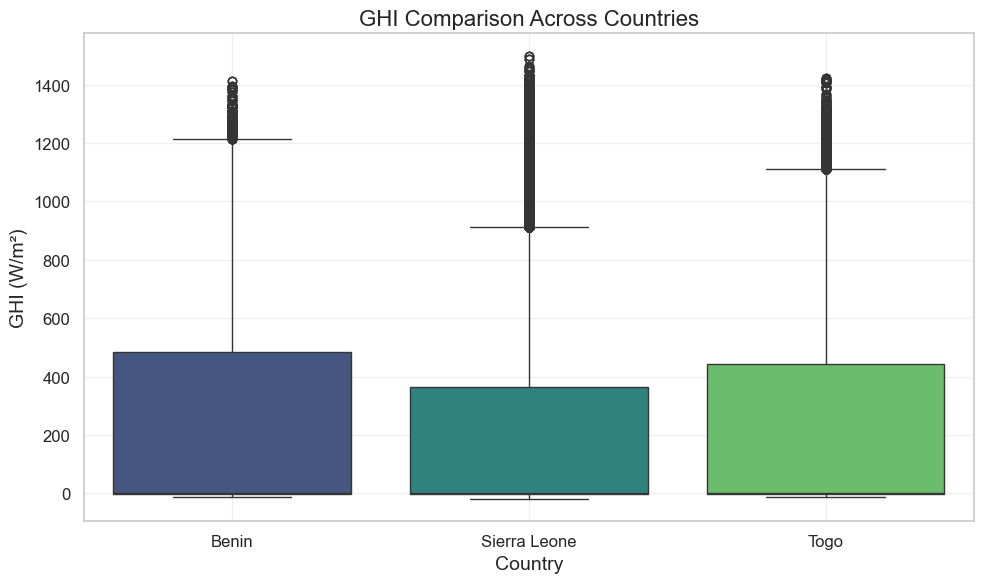

C:\Users\HP\AppData\Local\Temp\ipykernel_40520\3415116984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')


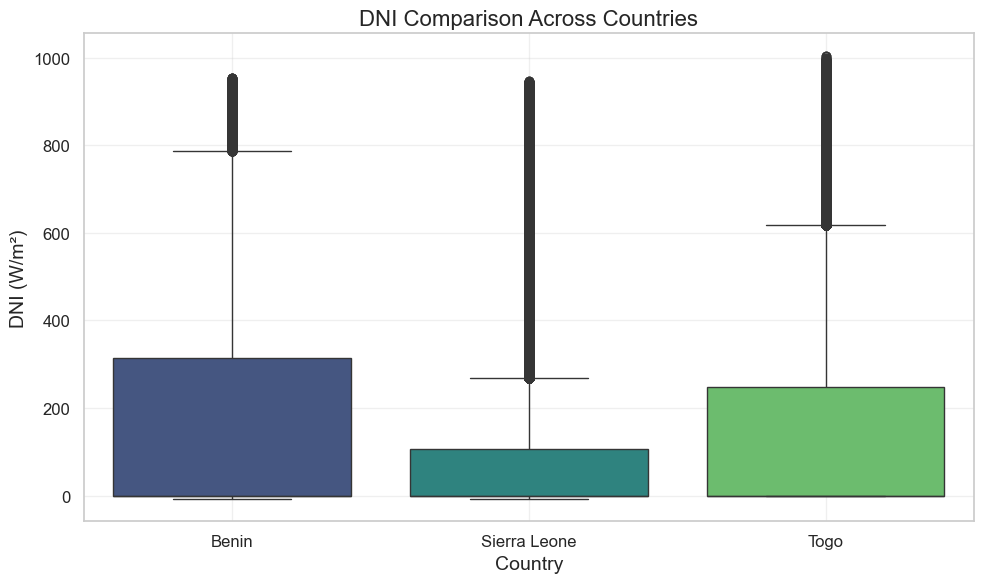

C:\Users\HP\AppData\Local\Temp\ipykernel_40520\3415116984.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')


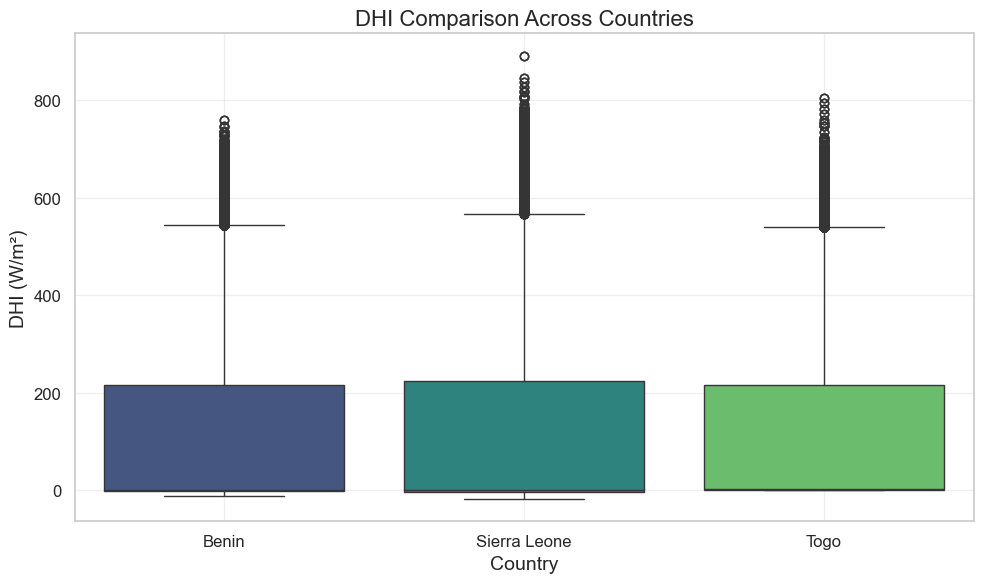

In [8]:
# Create boxplots for each metric\n",
print("Creating boxplots for each metric...")
for metric in metrics:
    if metric in combined_df.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Country', y=metric, data=combined_df, palette='viridis')
        plt.title(f'{metric} Comparison Across Countries')
        plt.xlabel('Country')
        plt.ylabel(f'{metric} (W/m²)')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: {metric} not found in all datasets, skipping boxplot")

## 4. Summary Statistics

In [18]:
## 4. Summary Statistics
summary_data = []
for country in combined_df['Country'].unique():
    country_data = combined_df[combined_df['Country'] == country]
    country_stats = {'Country': country}
    for metric in metrics:
        if metric in country_data.columns:
            country_stats[f'{metric}_Mean'] = country_data[metric].mean()
            country_stats[f'{metric}_Median'] = country_data[metric].median()
            country_stats[f'{metric}_StdDev'] = country_data[metric].std()
        else:
            print(f"Warning: {metric} not found in all datasets, skipping boxplot")
    summary_data.append(country_stats)

summary_df = pd.DataFrame(summary_data)
print("Summary Statistics Table:")
display(summary_df)
summary_df.to_csv('country_comparison_summary.csv', index=False)
print("Summary table saved to 'country_comparison_summary.csv'")

Summary Statistics Table:


,Country,GHI_Mean,GHI_Median,GHI_StdDev,DNI_Mean,DNI_Median,DNI_StdDev,DHI_Mean,DHI_Median,DHI_StdDev
0,Benin,240.809263,1.9,331.216841,167.365081,-0.1,261.792646,115.475499,1.6,158.732037
1,Sierra Leone,202.144198,0.3,298.590504,116.493583,-0.1,218.733148,113.817295,-0.1,158.994532
2,Togo,230.746149,2.2,322.602954,151.388315,0.0,251.026136,116.536913,2.6,156.552078


Summary table saved to 'country_comparison_summary.csv'


## 5. Statistical Testing

In [19]:
for metric in metrics:
        if metric in combined_df.columns:
            countries_with_metric = combined_df.dropna(subset=[metric])
            # Check if we have data from at least 2 countries\n",
            if len(countries_with_metric['Country'].unique()) >= 2:
                # Create groups for statistical testing\n",
                groups = [countries_with_metric[countries_with_metric['Country'] == country][metric].values
                         for country in countries_with_metric['Country'].unique()]
                # Test for normality\n",
                normality_tests = []
                for i, country in enumerate(countries_with_metric['Country'].unique()):
                    if len(groups[i]) > 8:  # Shapiro-Wilk requires at least 3 samples\n",
                        stat, p = stats.shapiro(groups[i][:1000])  # Limit to 1000 samples for speed\n",
                        normality_tests.append(p > 0.05)
                # If all data is normally distributed, use ANOVA, otherwise use non-parametric Kruskal-Wallis\n",
                if all(normality_tests):
                    stat, p = stats.f_oneway(*groups)
                    test_name = "ANOVA"
                else:
                    stat, p = stats.kruskal(*groups)
                    test_name = "Kruskal-Wallis"
                print(f"{test_name} test for {metric}: statistic={stat:.4f}, p-value={p:.6f}")
                print(f"Conclusion: {'Significant difference' if p < 0.05 else 'No significant difference'} between countries")
            else:
               print(f"Not enough countries have {metric} data for statistical testing")
        else:
            print(f"Warning: {metric} not found in all datasets, skipping statistical test")

Kruskal-Wallis test for GHI: statistic=13561.2837, p-value=0.000000
Conclusion: Significant difference between countries
Kruskal-Wallis test for DNI: statistic=271843.1140, p-value=0.000000
Conclusion: Significant difference between countries
Kruskal-Wallis test for DHI: statistic=195565.1137, p-value=0.000000
Conclusion: Significant difference between countries


## 6. GHI Ranking

Creating GHI ranking bar chart...


C:\Users\HP\AppData\Local\Temp\ipykernel_40520\4085418490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Country', y='GHI_Mean', data=ghi_ranking, palette='viridis')


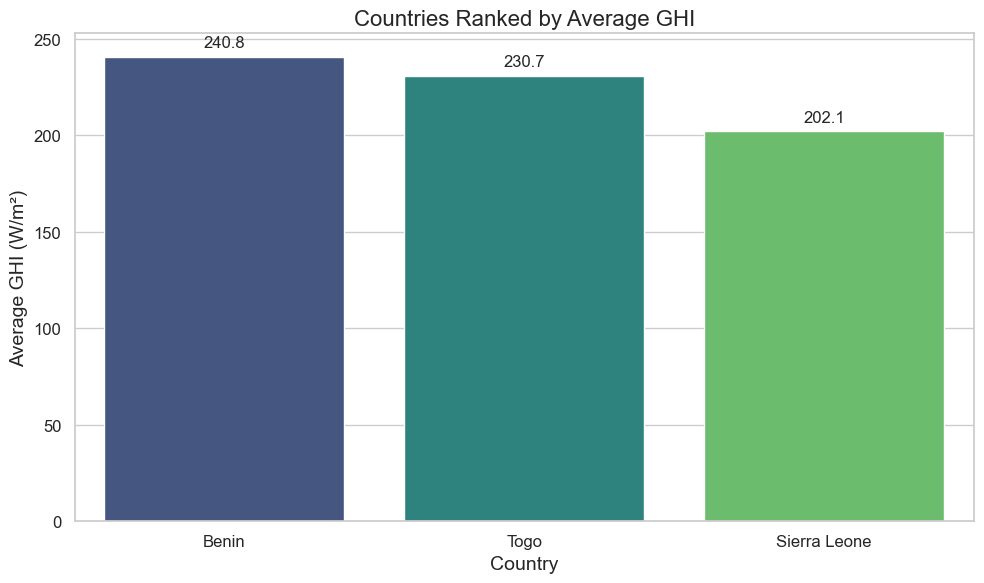

In [20]:
if 'GHI' in combined_df.columns:
    print("Creating GHI ranking bar chart...")
    ghi_ranking = summary_df.sort_values(by='GHI_Mean', ascending=False)
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Country', y='GHI_Mean', data=ghi_ranking, palette='viridis')
    plt.title('Countries Ranked by Average GHI')
    plt.xlabel('Country')
    plt.ylabel('Average GHI (W/m²)')
    for i, v in enumerate(ghi_ranking['GHI_Mean']):
        ax.text(i, v + 5, f"{v:.1f}", ha='center')
    
    plt.tight_layout()
    plt.show()

## 7. Key Observations

In [23]:
if 'GHI_Mean' in summary_df.columns:
    highest_ghi = summary_df.loc[summary_df['GHI_Mean'].idxmax()]
    highest_ghi_country = highest_ghi['Country']
    highest_ghi_value = highest_ghi['GHI_Mean']
    
    highest_variability = summary_df.loc[summary_df['GHI_StdDev'].idxmax()]
    highest_var_country = highest_variability['Country']
    highest_var_value = highest_variability['GHI_StdDev']
    
    print(f"* **{highest_ghi_country}** shows the highest solar potential with an average GHI of {highest_ghi_value:.1f} W/m², indicating better overall conditions for solar power generation.")

# Variability observation
if 'GHI_StdDev' in summary_df.columns and 'GHI_Mean' in summary_df.columns:
    cv_values = []
    for idx, row in summary_df.iterrows():
        if 'GHI_StdDev' in row and 'GHI_Mean' in row and pd.notnull(row['GHI_StdDev']) and pd.notnull(row['GHI_Mean']) and row['GHI_Mean'] > 0:
            cv = row['GHI_StdDev'] / row['GHI_Mean']
            cv_values.append((row['Country'], cv))
    
    if cv_values:
        cv_values.sort(key=lambda x: x[1], reverse=True)
        highest_cv_country, highest_cv = cv_values[0]
        print(f"* **{highest_cv_country}** demonstrates the most variable solar radiation (coefficient of variation: {highest_cv:.2f}), suggesting higher unpredictability and potential need for robust energy storage solutions.")

# DNI vs DHI pattern
if set(['DNI_Mean', 'DHI_Mean']).issubset(summary_df.columns):
    dni_dhi_ratios = []
    for idx, row in summary_df.iterrows():
        if pd.notnull(row['DNI_Mean']) and pd.notnull(row['DHI_Mean']) and row['DHI_Mean'] > 0:
            ratio = row['DNI_Mean'] / row['DHI_Mean']
            dni_dhi_ratios.append((row['Country'], ratio))
    
    if dni_dhi_ratios:
        dni_dhi_ratios.sort(key=lambda x: x[1], reverse=True)
        highest_ratio_country, highest_ratio = dni_dhi_ratios[0]
        lowest_ratio_country, lowest_ratio = dni_dhi_ratios[-1]
        
        print(f"* **{highest_ratio_country}** has the highest ratio of direct to diffuse radiation ({highest_ratio:.2f}), suggesting clearer skies and potentially better conditions for concentrated solar power systems, while **{lowest_ratio_country}** shows more diffuse radiation, which may benefit from photovoltaic systems that can utilize scattered light.")

# Statistical significance
print("\n**Statistical Significance**:")
for metric in metrics:
    if metric in combined_df.columns:
        countries_with_metric = combined_df.dropna(subset=[metric])
        if len(countries_with_metric['Country'].unique()) >= 2:
            # Create groups for statistical testing
            groups = [countries_with_metric[countries_with_metric['Country'] == country][metric].values 
                     for country in countries_with_metric['Country'].unique()]
            
            # Run the test again just for the markdown
            stat, p = stats.kruskal(*groups)
            if p < 0.05:
                print(f"* The differences in **{metric}** between countries are statistically significant (p = {p:.6f})")
            else:
                print(f"* No statistically significant differences in **{metric}** between countries (p = {p:.6f})")



* **Benin** shows the highest solar potential with an average GHI of 240.8 W/m², indicating better overall conditions for solar power generation.
* **Sierra Leone** demonstrates the most variable solar radiation (coefficient of variation: 1.48), suggesting higher unpredictability and potential need for robust energy storage solutions.
* **Benin** has the highest ratio of direct to diffuse radiation (1.45), suggesting clearer skies and potentially better conditions for concentrated solar power systems, while **Sierra Leone** shows more diffuse radiation, which may benefit from photovoltaic systems that can utilize scattered light.

**Statistical Significance**:
* The differences in **GHI** between countries are statistically significant (p = 0.000000)
* The differences in **DNI** between countries are statistically significant (p = 0.000000)
* The differences in **DHI** between countries are statistically significant (p = 0.000000)
